# The notebook based on the random-selected dataset5.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Data Preprocessing

In [2]:
import pandas as pd

In [3]:
train=pd.read_csv('training set5.csv')

### Transform the event_time into type of (midnight, forenoon, afternoon and evening)

In [4]:
train['event_time']=[x[11:13] for x in train['event_time']]
train

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,17,view,5100689,2053013553341792533,electronics.clocks,apple,332.93,513332491,f3fa1306-1105-43fb-a06b-c24ac2097968
1,18,view,38900065,2085718636156158307,NaN,NaN,63.06,514614931,cc80918e-3864-405e-8f69-eef75c5677c2
2,13,view,2702277,2053013563911439225,appliances.kitchen.refrigerators,lg,463.31,517543685,17d1b799-a8c5-4f9e-96a1-4a2b6092e7c8
3,04,view,6000172,2053013560807654091,auto.accessories.alarm,pandora,701.18,513551134,4175d626-5347-42f5-b458-8ba7279606eb
4,16,view,3700779,2053013565983425517,appliances.environment.vacuum,xiaomi,297.29,563759937,b3c7192f-74c3-4c81-ab47-0e706a668256
5,19,view,1005103,2053013555631882655,electronics.smartphone,xiaomi,93.95,571150482,4c615aa1-2990-4377-b399-b8d42fafe509
6,20,view,100002799,2152289064542273825,NaN,resanta,40.39,576093661,ed131612-93d6-4b2f-b382-61cf7ff0eb5f
7,14,view,58300001,2158174724725670855,NaN,redmond,51.46,512839940,b9f7d482-5f90-4103-83ae-8bc6c91cbca6
8,13,view,1005115,2053013555631882655,electronics.smartphone,apple,975.56,515895029,746cf64f-9e33-481a-87b5-8031ff557e29
9,19,view,1480611,2053013561092866779,computers.desktop,lenovo,645.24,516084060,d5de4d33-4e0a-40dc-84ca-f614e7d9e90d


In [5]:
for i in range(0,len(train['event_time'])):
    if 0<=int(train['event_time'][i])<6:
        train.loc[i,'event_time'] = 'midnight'
    elif 6<=int(train['event_time'][i])<12:
        train.loc[i,'event_time'] = 'forenoon'
    elif 12<=int(train['event_time'][i])<18:
        train.loc[i,'event_time'] = 'afternoon'
    elif 18<=int(train['event_time'][i])<=24:
        train.loc[i,'event_time'] = 'evening'

In [6]:
train.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,afternoon,view,5100689,2053013553341792533,electronics.clocks,apple,332.93,513332491,f3fa1306-1105-43fb-a06b-c24ac2097968
1,evening,view,38900065,2085718636156158307,NaN,NaN,63.06,514614931,cc80918e-3864-405e-8f69-eef75c5677c2
2,afternoon,view,2702277,2053013563911439225,appliances.kitchen.refrigerators,lg,463.31,517543685,17d1b799-a8c5-4f9e-96a1-4a2b6092e7c8
3,midnight,view,6000172,2053013560807654091,auto.accessories.alarm,pandora,701.18,513551134,4175d626-5347-42f5-b458-8ba7279606eb
4,afternoon,view,3700779,2053013565983425517,appliances.environment.vacuum,xiaomi,297.29,563759937,b3c7192f-74c3-4c81-ab47-0e706a668256


### Drop out the missing value.

In [7]:
train=train.dropna()

# Develop a (Xtrain，Ytrain) set.

In [9]:
X= train.drop('event_type',axis=1)
Y=train.iloc[:,1]

In [10]:
X

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session
0,afternoon,5100689,2053013553341792533,electronics.clocks,apple,332.93,513332491,f3fa1306-1105-43fb-a06b-c24ac2097968
2,afternoon,2702277,2053013563911439225,appliances.kitchen.refrigerators,lg,463.31,517543685,17d1b799-a8c5-4f9e-96a1-4a2b6092e7c8
3,midnight,6000172,2053013560807654091,auto.accessories.alarm,pandora,701.18,513551134,4175d626-5347-42f5-b458-8ba7279606eb
4,afternoon,3700779,2053013565983425517,appliances.environment.vacuum,xiaomi,297.29,563759937,b3c7192f-74c3-4c81-ab47-0e706a668256
5,evening,1005103,2053013555631882655,electronics.smartphone,xiaomi,93.95,571150482,4c615aa1-2990-4377-b399-b8d42fafe509
...,...,...,...,...,...,...,...,...
9992,forenoon,4502166,2053013563877884791,appliances.kitchen.hob,midea,231.64,524363484,cfb279f0-659e-4ad1-96f1-b3c588f7dbc4
9994,afternoon,1004250,2053013555631882655,electronics.smartphone,apple,807.72,520677806,fbb6a8c6-8a2b-464a-9b62-df7f13d1d057
9995,forenoon,5100719,2053013553341792533,electronics.clocks,samsung,151.61,546835425,af4d3406-9445-49aa-b888-31fe9339a716
9996,afternoon,1004767,2053013555631882655,electronics.smartphone,samsung,246.04,564068124,d39f55e8-b84f-469a-b5e9-aef8ee55ade7


In [11]:
Y

0       view
2       view
3       view
4       view
5       view
        ... 
9992    view
9994    view
9995    view
9996    view
9999    view
Name: event_type, Length: 6205, dtype: object

### LabelEncoder

In [12]:
product_tags = X.iloc[:, 0]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
X.iloc[:, 0] = label

product_tags = X.iloc[:, 3]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
X.iloc[:, 3] = label

product_tags = X.iloc[:, 4]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
X.iloc[:, 4] = label

product_tags = X.iloc[:, 7]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
X.iloc[:, 7] = label

In [13]:
X

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session
0,0,5100689,2053013553341792533,88,28,332.93,513332491,5915
2,0,2702277,2053013563911439225,41,282,463.31,517543685,571
3,3,6000172,2053013560807654091,49,353,701.18,513551134,1569
4,0,3700779,2053013565983425517,24,500,297.29,563759937,4420
5,1,1005103,2053013555631882655,89,500,93.95,571150482,1818
...,...,...,...,...,...,...,...,...
9992,2,4502166,2053013563877884791,33,313,231.64,524363484,5049
9994,0,1004250,2053013555631882655,89,28,807.72,520677806,6097
9995,2,5100719,2053013553341792533,88,403,151.61,546835425,4315
9996,0,1004767,2053013555631882655,89,403,246.04,564068124,5131


In [14]:
Y

0       view
2       view
3       view
4       view
5       view
        ... 
9992    view
9994    view
9995    view
9996    view
9999    view
Name: event_type, Length: 6205, dtype: object

In [15]:
df=pd.concat([X,Y],axis=1)
df.head()

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session,event_type
0,0,5100689,2053013553341792533,88,28,332.93,513332491,5915,view
2,0,2702277,2053013563911439225,41,282,463.31,517543685,571,view
3,3,6000172,2053013560807654091,49,353,701.18,513551134,1569,view
4,0,3700779,2053013565983425517,24,500,297.29,563759937,4420,view
5,1,1005103,2053013555631882655,89,500,93.95,571150482,1818,view


In [16]:
product_tags = df.iloc[:, 8]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #实例化
le = le.fit(product_tags)
label = le.transform(product_tags)
df.iloc[:, 8] = label

In [17]:
df

,event_time,product_id,category_id,category_code,brand,price,user_id,user_session,event_type
0,0,5100689,2053013553341792533,88,28,332.93,513332491,5915,2
2,0,2702277,2053013563911439225,41,282,463.31,517543685,571,2
3,3,6000172,2053013560807654091,49,353,701.18,513551134,1569,2
4,0,3700779,2053013565983425517,24,500,297.29,563759937,4420,2
5,1,1005103,2053013555631882655,89,500,93.95,571150482,1818,2
...,...,...,...,...,...,...,...,...,...
9992,2,4502166,2053013563877884791,33,313,231.64,524363484,5049,2
9994,0,1004250,2053013555631882655,89,28,807.72,520677806,6097,2
9995,2,5100719,2053013553341792533,88,403,151.61,546835425,4315,2
9996,0,1004767,2053013555631882655,89,403,246.04,564068124,5131,2


# Visualization and data analysis

In [18]:
train

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,afternoon,view,5100689,2053013553341792533,electronics.clocks,apple,332.93,513332491,f3fa1306-1105-43fb-a06b-c24ac2097968
2,afternoon,view,2702277,2053013563911439225,appliances.kitchen.refrigerators,lg,463.31,517543685,17d1b799-a8c5-4f9e-96a1-4a2b6092e7c8
3,midnight,view,6000172,2053013560807654091,auto.accessories.alarm,pandora,701.18,513551134,4175d626-5347-42f5-b458-8ba7279606eb
4,afternoon,view,3700779,2053013565983425517,appliances.environment.vacuum,xiaomi,297.29,563759937,b3c7192f-74c3-4c81-ab47-0e706a668256
5,evening,view,1005103,2053013555631882655,electronics.smartphone,xiaomi,93.95,571150482,4c615aa1-2990-4377-b399-b8d42fafe509
...,...,...,...,...,...,...,...,...,...
9992,forenoon,view,4502166,2053013563877884791,appliances.kitchen.hob,midea,231.64,524363484,cfb279f0-659e-4ad1-96f1-b3c588f7dbc4
9994,afternoon,view,1004250,2053013555631882655,electronics.smartphone,apple,807.72,520677806,fbb6a8c6-8a2b-464a-9b62-df7f13d1d057
9995,forenoon,view,5100719,2053013553341792533,electronics.clocks,samsung,151.61,546835425,af4d3406-9445-49aa-b888-31fe9339a716
9996,afternoon,view,1004767,2053013555631882655,electronics.smartphone,samsung,246.04,564068124,d39f55e8-b84f-469a-b5e9-aef8ee55ade7


In [19]:
train.describe()

,product_id,category_id,price,user_id
count,6.205000e+03,6.205000e+03,6205.000000,6.205000e+03
mean,6.239513e+06,2.055629e+18,350.730714,5.368627e+08
std,1.116455e+07,1.550395e+16,373.228253,2.117730e+07
min,1.002062e+06,2.053014e+18,1.250000,4.412841e+08
25%,1.004902e+06,2.053014e+18,105.280000,5.162567e+08
50%,1.801766e+06,2.053014e+18,215.420000,5.330961e+08
75%,5.100710e+06,2.053014e+18,460.240000,5.564906e+08
max,1.000262e+08,2.179888e+18,2573.810000,5.798408e+08


In [20]:
train["event_time"].value_counts()

afternoon    2348
forenoon     2011
midnight     1102
evening       744
Name: event_time, dtype: int64

In [21]:
train["event_time"].value_counts()

afternoon    2348
forenoon     2011
midnight     1102
evening       744
Name: event_time, dtype: int64

In [22]:
train["brand"].value_counts()

samsung    1203
apple       926
xiaomi      586
huawei      210
lg          133
           ... 
leo           1
mantra        1
laudio        1
acv           1
apacer        1
Name: brand, Length: 512, dtype: int64

In [23]:
train["price"].value_counts()

643.23    29
89.84     26
231.64    22
154.42    22
308.86    22
          ..
976.30     1
244.46     1
544.38     1
38.41      1
39.92      1
Name: price, Length: 3389, dtype: int64

Saving figure attribute_histogram_plots


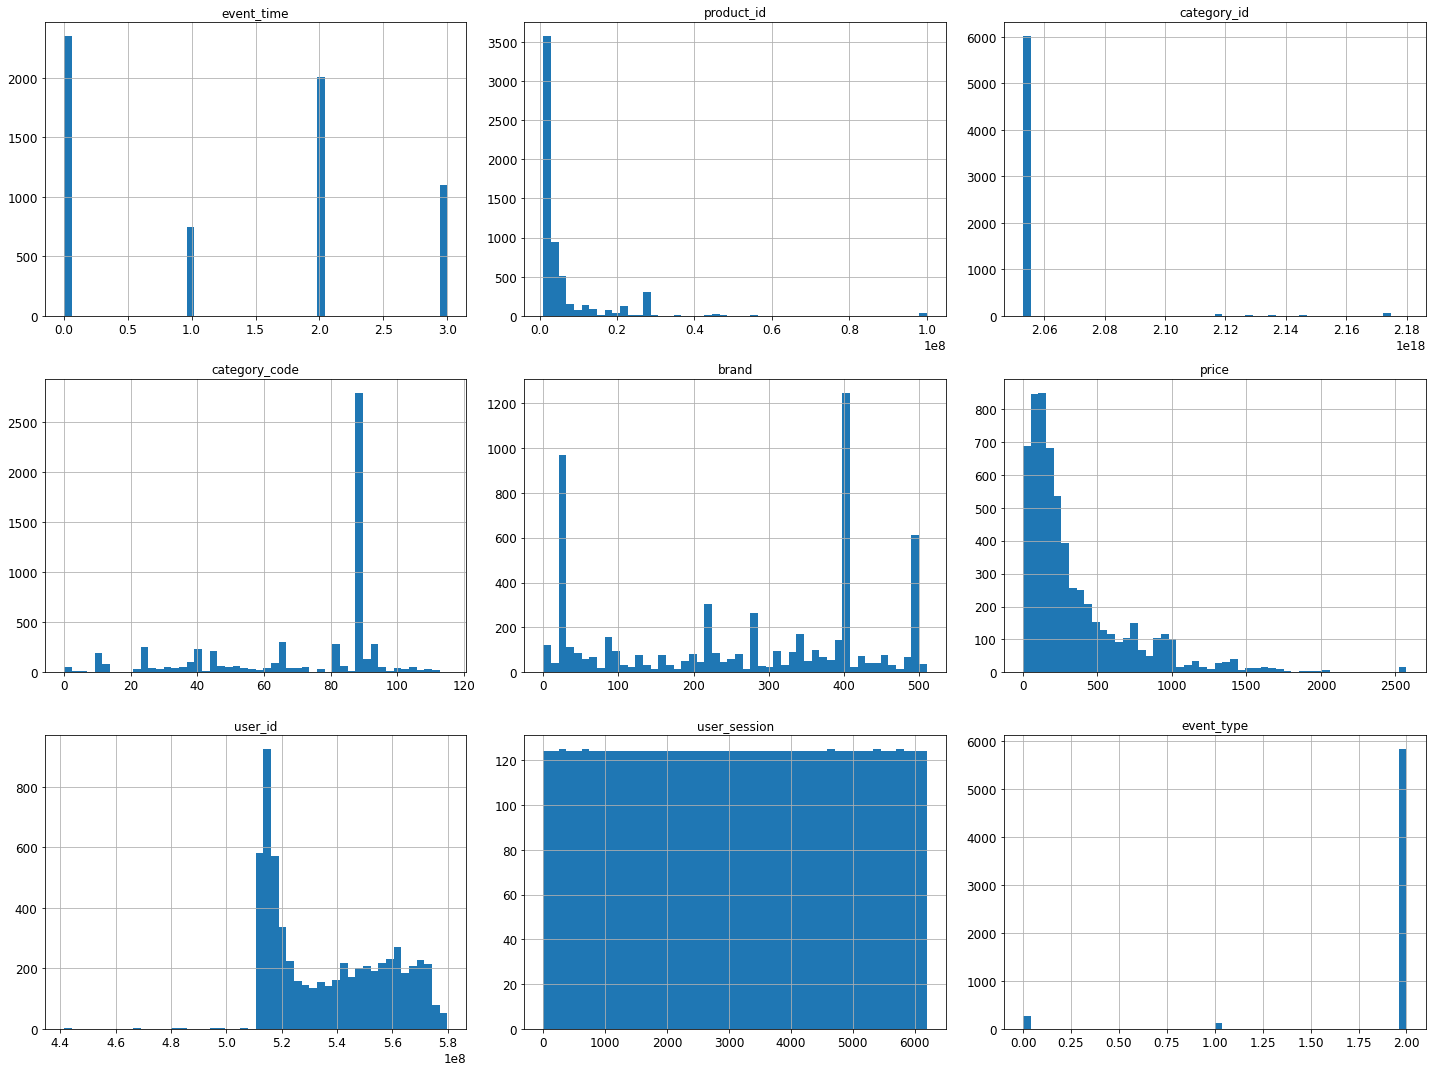

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.figure(dpi=300)
plt.show()

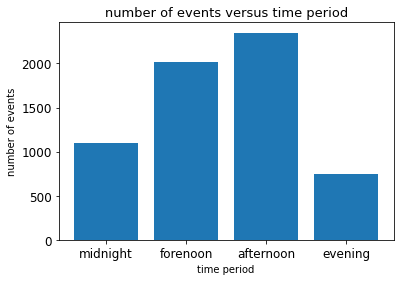

In [25]:
length1 = train["event_time"].value_counts()[2]
length2 = train["event_time"].value_counts()[1]
length3 = train["event_time"].value_counts()[0]
length4 = train["event_time"].value_counts()[3]

data = pd.DataFrame({'midnight':[length1],'forenoon':[length2],'afternoon':[length3],'evening':[length4]})
fig,ax = plt.subplots()
ax.bar(range(4),data.sum())
ax.set_xticks(range(4))
ax.set_xticklabels(data.columns)
ax.set_xlabel('time period',fontsize=10)
ax.set_ylabel('number of events',fontsize=10)
plt.title('number of events versus time period',fontsize=13)
plt.figure(dpi=300)
plt.show()


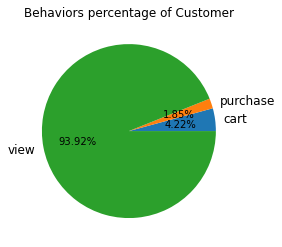

In [26]:
pie_chart = train.groupby('event_type').size().reset_index(name = 'temp')
plt.pie(pie_chart['temp'], labels = pie_chart['event_type'],autopct = '%1.2f%%')
plt.title('Behaviors percentage of Customer')
plt.figure(dpi=500)
plt.subplots_adjust(0.3,0,1,1)
plt.show()

In [ ]:
af = train["price"]
import matplotlib.pyplot as plt
af.hist(bins=50, figsize=(10,7.5))
plt.xlabel('price of a product',fontsize=15)
plt.ylabel('number of products',fontsize=15)
plt.figure(dpi=150)
plt.show()

# Models operating

# 1.Linear regression

In [8]:
df1=train.drop(['product_id','category_id','category_code','user_id','user_session'],axis=1)

In [9]:
df1

,event_time,event_type,brand,price
0,afternoon,view,apple,332.93
2,afternoon,view,lg,463.31
3,midnight,view,pandora,701.18
4,afternoon,view,xiaomi,297.29
5,evening,view,xiaomi,93.95
8,afternoon,view,apple,975.56
9,evening,view,lenovo,645.24
10,afternoon,view,barbie,19.69
12,forenoon,view,apple,786.11
13,afternoon,view,saturn,244.28


In [10]:
product_tags = df1.iloc[:, 0]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
le = le.fit(product_tags)
label = le.transform(product_tags)
df1.iloc[:, 0] = label\

product_tags1 = df1.iloc[:, 1]
le = LabelEncoder() 
le = le.fit(product_tags1)
label = le.transform(product_tags1)
df1.iloc[:, 1] = label

product_tags2 = df1.iloc[:, 2]
le = LabelEncoder() 
le = le.fit(product_tags2)
label = le.transform(product_tags2)
df1.iloc[:, 2] = label

In [11]:
df1

,event_time,event_type,brand,price
0,0,2,28,332.93
2,0,2,282,463.31
3,3,2,353,701.18
4,0,2,500,297.29
5,1,2,500,93.95
8,0,2,28,975.56
9,1,2,279,645.24
10,0,2,59,19.69
12,2,2,28,786.11
13,0,2,407,244.28


In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df1, test_size=0.2, random_state=42)

In [13]:
test_set.head()

,event_time,event_type,brand,price
8415,0,2,403,348.76
1953,1,2,163,36.04
7826,0,2,28,160.11
7002,3,2,337,46.51
8412,2,0,28,795.10


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import seaborn as sns
from sklearn import linear_model

In [15]:
results = smf.ols('event_time ~ event_type + price + brand', data=df1).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             event_time   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.277
Date:                Sat, 02 Oct 2021   Prob (F-statistic):             0.0776
Time:                        02:46:58   Log-Likelihood:                -9668.0
No. Observations:                6205   AIC:                         1.934e+04
Df Residuals:                    6201   BIC:                         1.937e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4907      0.075     19.977      0.0

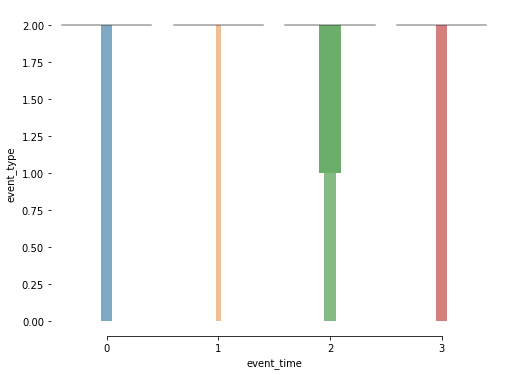

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
sns.boxenplot(x='event_time',y='event_type',data=df1)
sns.despine(trim=True,left=True)

In [17]:
corr=df1.corr()
corr

,event_time,event_type,brand,price
event_time,1.000000,-0.031240,-0.006917,-0.006142
event_type,-0.031240,1.000000,0.006573,-0.005887
brand,-0.006917,0.006573,1.000000,-0.316112
price,-0.006142,-0.005887,-0.316112,1.000000


(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text yticklabel objects>)

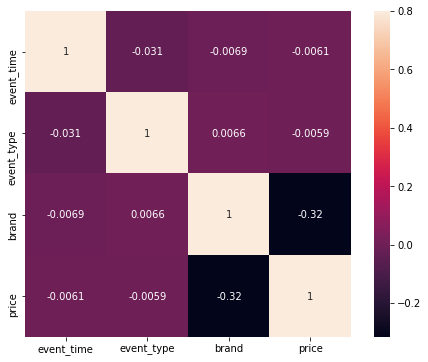

In [18]:
ax=plt.subplots(figsize=(8,6))
ax=sns.heatmap(corr,vmax=.8,square=True,annot=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Linear regression(2)

In [19]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [20]:
cols = list(df1)
cols.insert(1,cols.pop(cols.index('event_time'))) # 2是将d放在哪一列，cols.pop(cols.index('d')) 是要换的d列
df1 = df1.loc[:,cols] # 开始按照两列互换

## 对数据集进行测试集合训练集划分
# X：特征矩阵(类型一般是DataFrame)
# Y：特征对应的Label标签(类型一般是Series)
# test_size: 对X/Y进行划分的时候，测试集合的数据占比, 是一个(0,1)之间的float类型的值
# random_state: 数据分割是基于随机器进行分割的，该参数给定随机数种子；给一个值(int类型)的作用就是保证每次分割所产生的数数据集是完全相同的

X = df1.iloc[:,1:]
Y=df1['event_type']
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)


(4964, 3)
(1241, 3)
(4964,)


In [21]:
# 查看训练集上的数据信息(X)
X_train.describe()

,event_time,brand,price
count,4964.000000,4964.000000,4964.000000
mean,1.299355,266.116438,352.732871
std,1.145927,167.869380,375.476513
min,0.000000,0.000000,1.250000
25%,0.000000,82.000000,105.177500
50%,2.000000,290.000000,212.855000
75%,2.000000,403.000000,460.517500
max,3.000000,510.000000,2573.810000


In [22]:
from sklearn.preprocessing import StandardScaler
## 数据标准化
# StandardScaler：将数据转换为标准差为1的数据集(有一个数据的映射)
# scikit-learn中：如果一个API名字有fit，那么就有模型训练的含义，没法返回值
# scikit-learn中：如果一个API名字中有transform， 那么就表示对数据具有转换的含义操作
# scikit-learn中：如果一个API名字中有predict，那么就表示进行数据预测，会有一个预测结果输出
# scikit-learn中：如果一个API名字中既有fit又有transform的情况下，那就是两者的结合(先做fit，再做transform)
ss = StandardScaler() # 模型对象创建
X_train = ss.fit_transform(X_train) # 训练模型并转换训练集
X_test = ss.transform(X_test) ## 直接使用在模型构建数据上进行一个数据标准化操作 (测试集)

pd.DataFrame(X_train).describe()


D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


,0,1,2
count,4.964000e+03,4.964000e+03,4.964000e+03
mean,-7.208845e-16,-4.761613e-17,3.985111e-17
std,1.000101e+00,1.000101e+00,1.000101e+00
min,-1.134004e+00,-1.585419e+00,-9.361925e-01
25%,-1.134004e+00,-1.096894e+00,-6.593763e-01
50%,6.114833e-01,1.422890e-01,-3.725718e-01
75%,6.114833e-01,8.154992e-01,2.870898e-01
max,1.484227e+00,1.452964e+00,5.915952e+00


In [23]:
## 模型训练
import numpy as np
lr = LinearRegression(fit_intercept=True) # 模型对象构建
'''
LinearRegression(fit_intercept=True, normalize=False,copy_X=True,n_jobs=1)
	fit_intercept：是否需要截距
	normalize：是否做标准化，上面已在单拿出来做了标准化
	copy_X：是否进行数据复制，如果复制了，对数据进行修改，就不会改变原数据
	n_jobs：并行运行。但需要CPU至少双核，基本不怎么用
'''
lr.fit(X_train, Y_train) ## 训练模型
## 模型校验
y_predict = lr.predict(X_test) ## 预测结果

print("training R2:",lr.score(X_train, Y_train))
print("test R2:",lr.score(X_test, Y_test))
mse = np.average((y_predict-Y_test)**2)
rmse = np.sqrt(mse)
print("rmse:",rmse)
# 输出模型训练得到的相关参数
print("model coefficient(θ):", end="")
print(lr.coef_)
print("model intercept:", end='')
print(lr.intercept_)


training R2: 0.00088181091059647
test R2: -0.001517469494264123
rmse: 0.39098804337027765
model coefficient(θ):[-0.01059333  0.00018721 -0.00691094]
model intercept:1.8932312651087833


### Model testing (require sklearn version =0.24)  

In [24]:
## 模型保存/持久化
# 在机器学习部署的时候，实际上其中一种方式就是将模型进行输出；另外一种方式就是直接将预测结果输出
# 模型输出一般是将模型输出到磁盘文件
from sklearn.externals import joblib

# 保存模型要求给定的文件所在的文件夹比较存在
joblib.dump(ss, "df1_ss.model") ## 将标准化模型保存
joblib.dump(lr, "df1_lr.model") ## 将模型保存

['df1_lr.model']

In [25]:
#load model
ss3 = joblib.load("df1_ss.model") 
lr3 = joblib.load("df1_lr.model") 

# predict
df1 = [[3, 398, 127.91]]
df1 = ss.transform(df1)
print(df1)
lr.predict(df1)

[[ 1.48422704  0.78571117 -0.59882712]]


array([1.88179391])

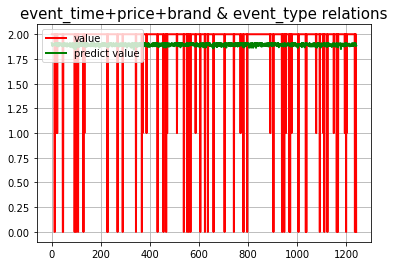

In [26]:
## 预测值和实际值画图比较
t=np.arange(len(X_test))
plt.figure(facecolor='w')#建一个画布，facecolor是背景色
plt.plot(t, Y_test, 'r-', linewidth=2, label='value')
plt.plot(t, y_predict, 'g-', linewidth=2, label='predict value')
plt.legend(loc = 'upper left')#显示图例，设置图例的位置
plt.title("event_time+price+brand & event_type relations", fontsize=15)
plt.grid(b=True)#加网格
plt.show()

# Linear Regression(3)

In [46]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
results = smf.ols(formula='event_time ~ event_type + price', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             event_time   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.154
Date:                Sat, 02 Oct 2021   Prob (F-statistic):             0.0428
Time:                        00:26:05   Log-Likelihood:                -9668.3
No. Observations:                6205   AIC:                         1.934e+04
Df Residuals:                    6202   BIC:                         1.936e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4700      0.069     21.336      0.0

# 2.Random forest

In [47]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [48]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3)
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)
print("Single Tree:{}".format(score_c)
,"Random Forest:{}".format(score_r)
)

Single Tree:0.882921589688507 Random Forest:0.9092373791621912


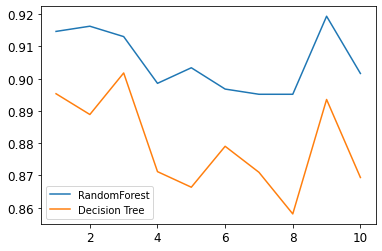

In [49]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,X,Y,cv=10)
clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,X,Y,cv=10)
plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()

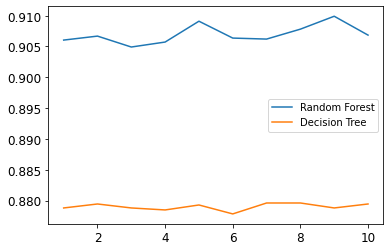

In [50]:
rfc_l = []
clf_l = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,X,Y,cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,X,Y,cv=10).mean()
    clf_l.append(clf_s)
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()

# 3.KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3)
knn = KNeighborsClassifier()    #实例化KNN模型
knn.fit(X_train, Y_train)      #放入训练数据进行训练
score_k = knn.score(Xtest,Ytest)
print(score_k)

0.9409237379162191


# 4.ADA Boost

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [56]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3)
ada = AdaBoostClassifier()    #实例化KNN模型
ada.fit(X_train, Y_train)       #放入训练数据进行训练
score_k = ada.score(Xtest,Ytest)
print(score_k)

0.939312567132116


# 5.Netural network

In [57]:
from sklearn import preprocessing
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, Y = make_classification(random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, Y_train)  # apply scaling on training data
pipe.score(X_test, Y_test)

0.96

In [59]:
from sklearn.neural_network import MLPClassifier
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3)

rdm = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(6228,1500,1000,), random_state=1)
rdm.fit(X_train, Y_train)
rdm.score(X_test,Y_test)

0.92